**Universidade Federal do Ceará - Campus Russas**

**Disciplina:** Inteligencia Artificial

**Professora:** Valeria Maria

**Semestre:** 2023-1

**Equipe:** Malleck Ravyn Leite dos Santos - **Matricula:** 516373

Elias Santos de Almeida - **Matricula:** 485307

**Tema:** Previsão se um indivíduo terá doença do coração.

In [ ]:
#
#NOME DA BASE DE DADOS
#doencas_cardiacas.csv
#LINK DA BASE DE DADOS: https://www.kaggle.com/datasets/naveengowda16/logistic-regression-heart-disease-prediction
#observação: Renomear o arquivo baixado para doencas_cardiacas
#

UTILIZANDO REGRESSÃO LOGISTICA PARA A RESOLUÇÃO DO PROBLEMA

**Regressão Logistica:** é um algoritmo de aprendizado de máquina utilizado para problemas de classificação binária, ou seja, quando o objetivo é prever uma variável de saída que assume apenas dois valores possíveis, como "sim" ou "não", "positivo" ou "negativo", "verdadeiro" ou "falso", entre outros. Ela utiliza a função logística, também conhecida como função sigmoid, para estimar a probabilidade de uma determinada observação pertencer a uma classe específica.

Em relação ao tema: Como estamos trabalhando com resultados de "sim" ou "não" no caso 0 e 1 a regressão se encaixar nesse problema especifico.

Acurácia: 0.8538251366120219


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


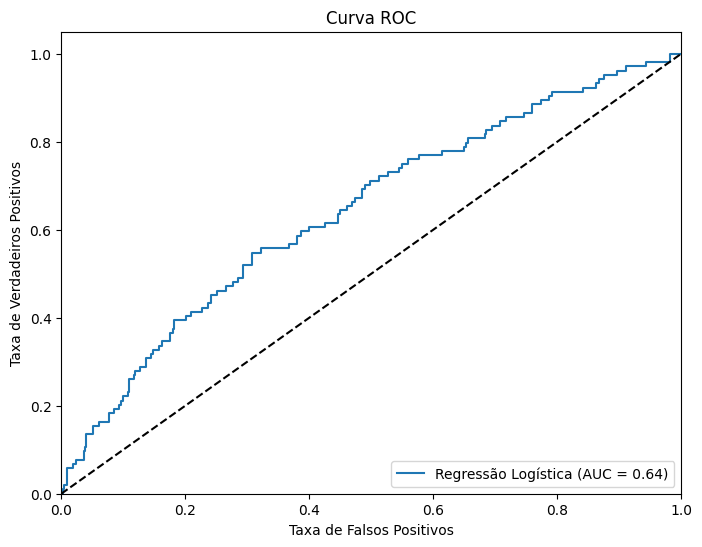

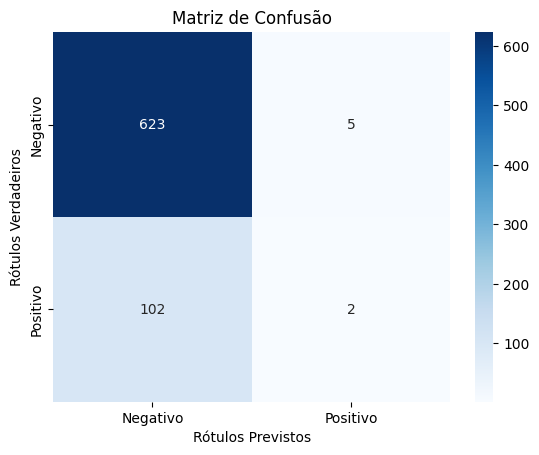

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix

# Carregar os dados com a base de dados
data = pd.read_csv("doencas_cardiacas.csv")

# Remover linhas com valores ausentes
data.dropna(inplace=True)


# Separar os dados de entrada (features) e os rótulos (labels)
X = data.drop("TenYearCHD", axis=1)   #estou excluindo essa coluna para o algoritmo treinar sem o resultado.
y = data["TenYearCHD"]                #coluna que quero preve o resultados.

# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

# Criar o modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo usando o conjunto de treinamento
model.fit(X_train, y_train)

# Fazer previsões usando o conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Calcular as probabilidades de classe positiva
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Regressão Logística (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Plotar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
labels = ['Negativo', 'Positivo']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()


MATRIZ DE CONFUSÃO:
    Os valores na diagonal principal (verdadeiro negativo e verdadeiro positivo) representam as previsões corretas feitas pelo modelo.
    Os valores fora da diagonal principal (falso positivo e falso negativo) representam as previsões incorretas feitas pelo modelo.


ACURÁCIA: Uma acurácia de 1.0 significa que todas as previsões do modelo estão corretas, enquanto uma acurácia de 0.0 indica que o modelo não fez nenhuma previsão correta.

In [ ]:
#============================================================================================================================================

UTILIZANDO SVM (Support Vector Machines) PARA A RESOLUÇÃO DO PROBLEMA

SVM (Support Vector Machines): é um algoritmo de aprendizado de máquina supervisionado usado para tarefas de classificação e regressão. Ele é principalmente usado para problemas de classificação binária, mas também pode ser estendido para classificação de várias classes.

Acurácia: 0.8565573770491803


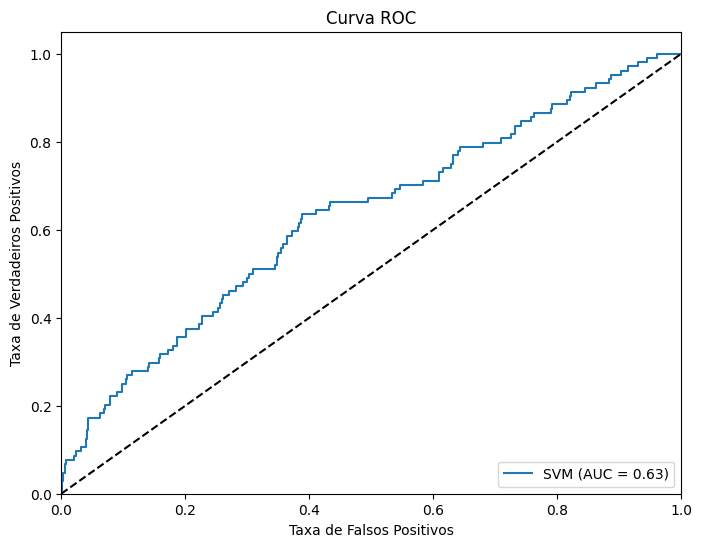

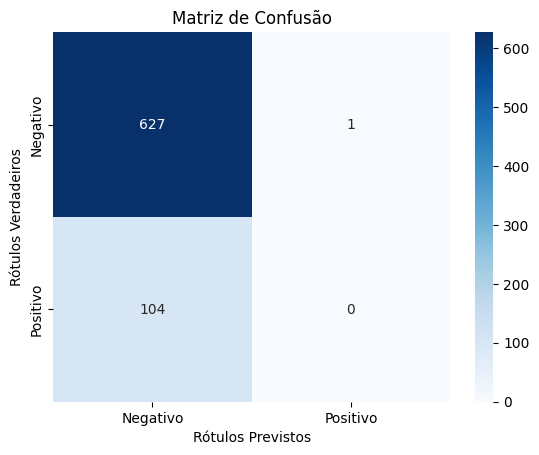

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix

# Carregar os dados com a base de dados
data = pd.read_csv("doencas_cardiacas.csv")

# Remover linhas com valores ausentes
data.dropna(inplace=True)

# Separar os dados de entrada (features) e os rótulos (labels)
X = data.drop("TenYearCHD", axis=1)
y = data["TenYearCHD"]

# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

# Criar o modelo SVM
model = SVC(probability=True)

# Treinar o modelo usando o conjunto de treinamento
model.fit(X_train, y_train)

# Fazer previsões usando o conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Calcular as probabilidades de classe positiva
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular a curva ROC e a área sob a curva (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

# Plotar a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='SVM (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Plotar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
labels = ['Negativo', 'Positivo']
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Rótulos Previstos')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')
plt.show()


ACURÁCIA: Uma acurácia de 1.0 significa que todas as previsões do modelo estão corretas, enquanto uma acurácia de 0.0 indica que o modelo não fez nenhuma previsão correta.

MATRIZ DE CONFUSÃO: Os valores na diagonal principal (verdadeiro negativo e verdadeiro positivo) representam as previsões corretas feitas pelo modelo. Os valores fora da diagonal principal (falso positivo e falso negativo) representam as previsões incorretas feitas pelo modelo.

In [ ]:
#============================================================================================================================================

UTILIZANDO REGRESSÃO LINEAR PARA A RESOLUÇÃO DO PROBLEMA

Regressão Linear: A regressão linear é um algoritmo de aprendizado de máquina que é usado para modelar a relação entre uma variável dependente (alvo) e uma ou mais variáveis independentes (características). É um dos métodos mais simples e amplamente utilizados para análise preditiva e inferencial.

Erro médio quadrado (MSE): 0.11490389677498834


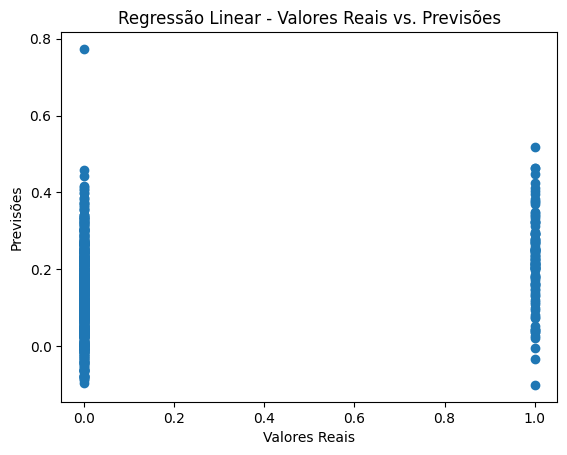

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Carregar os dados com a base de dados
data = pd.read_csv("doencas_cardiacas.csv")

# Remover linhas com valores ausentes
data.dropna(inplace=True)

# Separar os dados de entrada (features) e os rótulos (labels)
X = data.drop("TenYearCHD", axis=1)  # Excluindo essa coluna para o algoritmo treinar sem o resultado.
y = data["TenYearCHD"]  # Coluna que quero prever os resultados.

# Dividir os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo usando o conjunto de treinamento
model.fit(X_train, y_train)

# Fazer previsões usando o conjunto de teste
y_pred = model.predict(X_test)

# Calcular o erro médio quadrado (Mean Squared Error - MSE)
mse = mean_squared_error(y_test, y_pred)
print("Erro médio quadrado (MSE):", mse)

# Plotar os valores reais e as previsões
plt.scatter(y_test, y_pred)
plt.xlabel("Valores Reais")
plt.ylabel("Previsões")
plt.title("Regressão Linear - Valores Reais vs. Previsões")
plt.show()


ERRO MÉDIO QUADRADO (MSE): Um MSE próximo de zero indica um bom ajuste do modelo aos dados, ou seja, as previsões estão próximas dos valores reais.

CONCLUSÃO: Após os testes utilizando a base de dados e os três algoritmos
obtivemos o seguintes resultados:

Como os dois primeiros algortimos utilizam a Acurácia como coeficiente de desempenho e sabendo que quanto mais proximo de 1 e sua taxa de sucesso vamos calcular sua taxa de erro subtraindo:

Regressão logistica: Acurácia - 1 = 0.8538 - 1 = 0,1462 = **14,6%**

SVM (Support Vector Machines): Acurácia - 1 = 0,8565 - 1 = 0,1468 = **14,7%**

Sobre o terceiro algoritmo seu coeficiente de desepenho se dar pelo MSE ou erro médio quadrado onde quanto mais proximo de zero melhor o resultado então a taxa de erro se da:
Regressão Linear: MSE - 0 = 0.1149 = **11,5%**

Com esses resultados vimos que para uma simples previsão a regressão linear acaba sendo um pouco mais adequado ao problema e a base dados, seguindo pela regressão logistica e SVM o qual suas diferenças foram bem minimas.